In [55]:
#Importing the libraries that we need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from termcolor import colored as cl
from sklearn.metrics import * # get all metrics

# Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 


In [2]:
#read the data into dataframe

mush_df = pd.read_csv('mushrooms.csv')

#remap all of the fields to more comprehensive values
    
poisonous = {"p": "poisonous", "e": "edible"}
cap_shape = {"b": "bell","c": "conical", "x": "convex","f": "flat", "k": "knobbed", "s": "sunken"}
cap_surface = {"f":"fibrous","g":"grooves","y":"scaly","s":"smooth"}
cap_color = {"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
bruises = {"t":"bruises","f":"no bruises"}    
odor = {"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
gill_attachment = {"a":"attached","d":"descending","f":"free","n":"notched"}
gill_spacing = {"c":"close","w":"crowded","d":"distant"}
gill_size = {"b":"broad","n":"narrow"}
gill_color = {"k":"black","n":"brown","b":"buff","h":"chocolate","g":"gray","r":"green","o":"orange","u":"purple","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
stalk_shape = {"e":"enlarging","t":"tapering"}    
stalk_root = {"b":"bulbous","c":"club","u":"cup","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
stalk_surface_above_ring = {"f":"fibrous","y":"scaly","k":"silky","s":"smooth"}
stalk_surface_below_ring = {"f":"fibrous","y":"scaly","k":"silky","s":"smooth"}
stalk_color_above_ring = {"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","e":"red","w":"white","y":"yellow"}
stalk_color_below_ring = {"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","e":"red","w":"white","y":"yellow"}
veil_type = {"p":"partial","u":"universal"}
veil_color = {"n":"brown","o":"orange","w":"white","y":"yellow"}
ring_number = {"n":"none","o":"one",'t':"two"}   
ring_type = {"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
spore_color = {"k":"black","n":"brown","b":"buff","h":"chocolate","g":"gray","r":"green","o":"orange","u":"purple","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
population = {"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
habitat = {"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}

mush_df.replace( {
                 "class": poisonous,
                 "cap-shape": cap_shape,
                 "cap-surface": cap_surface,
                 "cap-color": cap_color,
                 "bruises": bruises,
                 "odor": odor,
                 "gill-attachment": gill_attachment,
                 "gill-spacing": gill_spacing,
                 "gill-size": gill_size,
                 "gill-color": gill_color,
                 "stalk-shape": stalk_shape,
                 "stalk-root": stalk_root,
                 "stalk-surface-above-ring": stalk_surface_above_ring,
                 "stalk-surface-below-ring": stalk_surface_below_ring,
                 "stalk-color-above-ring": stalk_color_above_ring,
                 "stalk-color-below-ring": stalk_color_below_ring,
                 "veil-type": veil_type,
                 "veil-color": veil_color,
                 "ring-number": ring_number,
                 "ring-type": ring_type,
                 "spore-print-color": spore_color,
                 "population": population,
                 "habitat": habitat
    }, inplace=True
               )
#for use later
mush_clean = mush_df


#mush_df['class'].map(poisonous)

mush_df2 = pd.get_dummies(mush_df)

#set the variables to x
X_mush = mush_df2.iloc[:,2:]

#set target values poisonous or not to y
y_mush = mush_df2.iloc[:,1]

feature_names = list(mush_df[:2])

# use the variables X_train2, y_train2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# In the assignment we reduced the size of the dataset to 25% for performance.  
# We can just re-use the above splits from the
# the 25% test split created above as the representative subset.

# Set the variables for use below
X_subset = X_test2
y_subset = y_test2

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


                               Feature  Gini Importance
0                         With No Odor         0.625144
1                   Stalk-Root is Club         0.169176
2                 Stalk-Root is Rooted         0.086589
3                 Spore Print is Green         0.034375
4          Odor: Is Anise; Fennel-like         0.023504
5                      Odor: Is Almond         0.019509
6   Stalk Surface Above Ring is Smooth         0.017094
7   Stalk Surface Below Ring is Scaley         0.013735
8                   Gill Size is Broad         0.005670
9             Cap Surface with Grooves         0.002617
10                 Clustered Mushrooms         0.001932
11                Cap Shape is Conical         0.000655


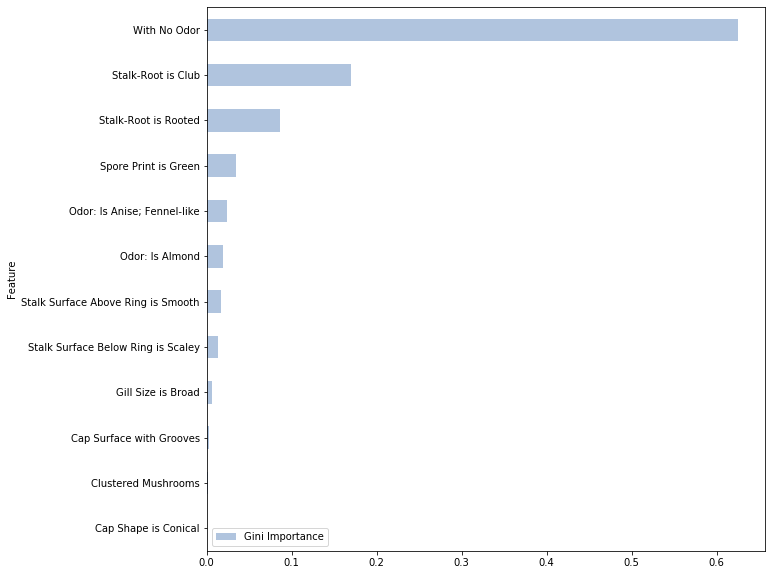

In [3]:
import matplotlib 
def feature_importance():
    from sklearn.tree import DecisionTreeClassifier
    #from adspy_shared_utilities import plot_decision_tree
    #from sklearn.model_selection import train_test_split
    #Load in data and train the decision tree classifier
    #Set max tree depth to truncate tree
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    
    #Print Accuracy of Training and Test
    #print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    # .format(clf.score(X_train2, y_train2)))
    #print('Accuracy of Decision Tree classifier on test set: {:.2f}'
    # .format(clf.score(X_test2, y_test2)))

    #Combine the Feature importance with the feature names printing the top 10 features
    feature_names_encoded = pd.merge((pd.Series(mush_df2.columns.values)[2:].reset_index()), 
                            #call feature importance from sklearn
                            pd.DataFrame(clf.feature_importances_),
                            #join with names can create the table
                            left_index=True, right_index=True).set_index('0_x').sort_values(by=['0_y'],
                            #Looking at the data we see 13 critical characteristics
                            ascending=False).head(12)
                            #cleaning up the data frame with more readable labels
    feature_names_encoded = feature_names_encoded.reset_index().rename(columns={'0_y': 'Gini Importance','0_x': 'Feature'})
    
    cleaned_features_dic =            {'odor_none': 'With No Odor', 
                                      'stalk-root_club': 'Stalk-Root is Club',
                                      'stalk-root_rooted': 'Stalk-Root is Rooted',
                                      'spore-print-color_green': 'Spore Print is Green',
                                      'odor_anise': 'Odor: Is Anise; Fennel-like',
                                      'odor_almond': 'Odor: Is Almond',
                                      'stalk-surface-above-ring_smooth': 'Stalk Surface Above Ring is Smooth',
                                      'stalk-surface-below-ring_scaly': 'Stalk Surface Below Ring is Scaley',
                                      'gill-size_broad': 'Gill Size is Broad',
                                      'cap-surface_grooves': 'Cap Surface with Grooves',
                                      'population_clustered': 'Clustered Mushrooms',
                                      'cap-shape_conical': 'Cap Shape is Conical',
                                      #Below have 0 gini
                                      'gill-size_n': 'Gill is narrow',
                                      'stalk-color-below-ring_white': 'Stalk below ring is white',
                                      'stalk-color-below-ring_red': 'Stalk below ring is red',
                                      'stalk-color-below-ring_p': 'Stalk below ring is pink'
                                     }
        
    feature_names_encoded.replace( {'Feature': cleaned_features_dic}, inplace=True)
    
    print(feature_names_encoded[['Feature', 'Gini Importance']])
    return feature_names_encoded, clf

feature_names_encoded, clf = feature_importance()

#sort features

feature_names_encoded = feature_names_encoded.sort_values('Gini Importance')


ax = feature_names_encoded.plot.barh(figsize = (10,10),x='Feature', y='Gini Importance', rot=0, color = 'lightsteelblue')

Accuracy of the model is 100.00%
F1 of the model is 100.00%
ROC AUC of the model is 100.00%
Recall of the model is 100.00%


'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="X[28] <= 0.5\\ngini = 0.499\\nsamples = 6093\\nvalue = [3147, 2946]", fillcolor="#fdf7f2"] ;\n1 [label="X[52] <= 0.5\\ngini = 0.28\\nsamples = 3431\\nvalue = [578, 2853]", fillcolor="#61b1ea"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[55] <= 0.5\\ngini = 0.13\\nsamples = 3037\\nvalue = [212, 2825]", fillcolor="#48a4e7"] ;\n1 -> 2 ;\n3 [label="X[23] <= 0.5\\ngini = 0.045\\nsamples = 2892\\nvalue = [67, 2825]", fillcolor="#3e9fe6"] ;\n2 -> 3 ;\n4 [label="X[22] <= 0.5\\ngini = 0.021\\nsamples = 2855\\nvalue = [30, 2825]", fillcolor="#3b9ee5"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 2825\\nvalue = [0, 2825]", fillcolor="#399de5"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 30\\nvalue = [30, 0]", fillcolor="#e58139"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 37\\nvalue = [37, 0]", fillcolor="#e58139"] ;\n3 -> 

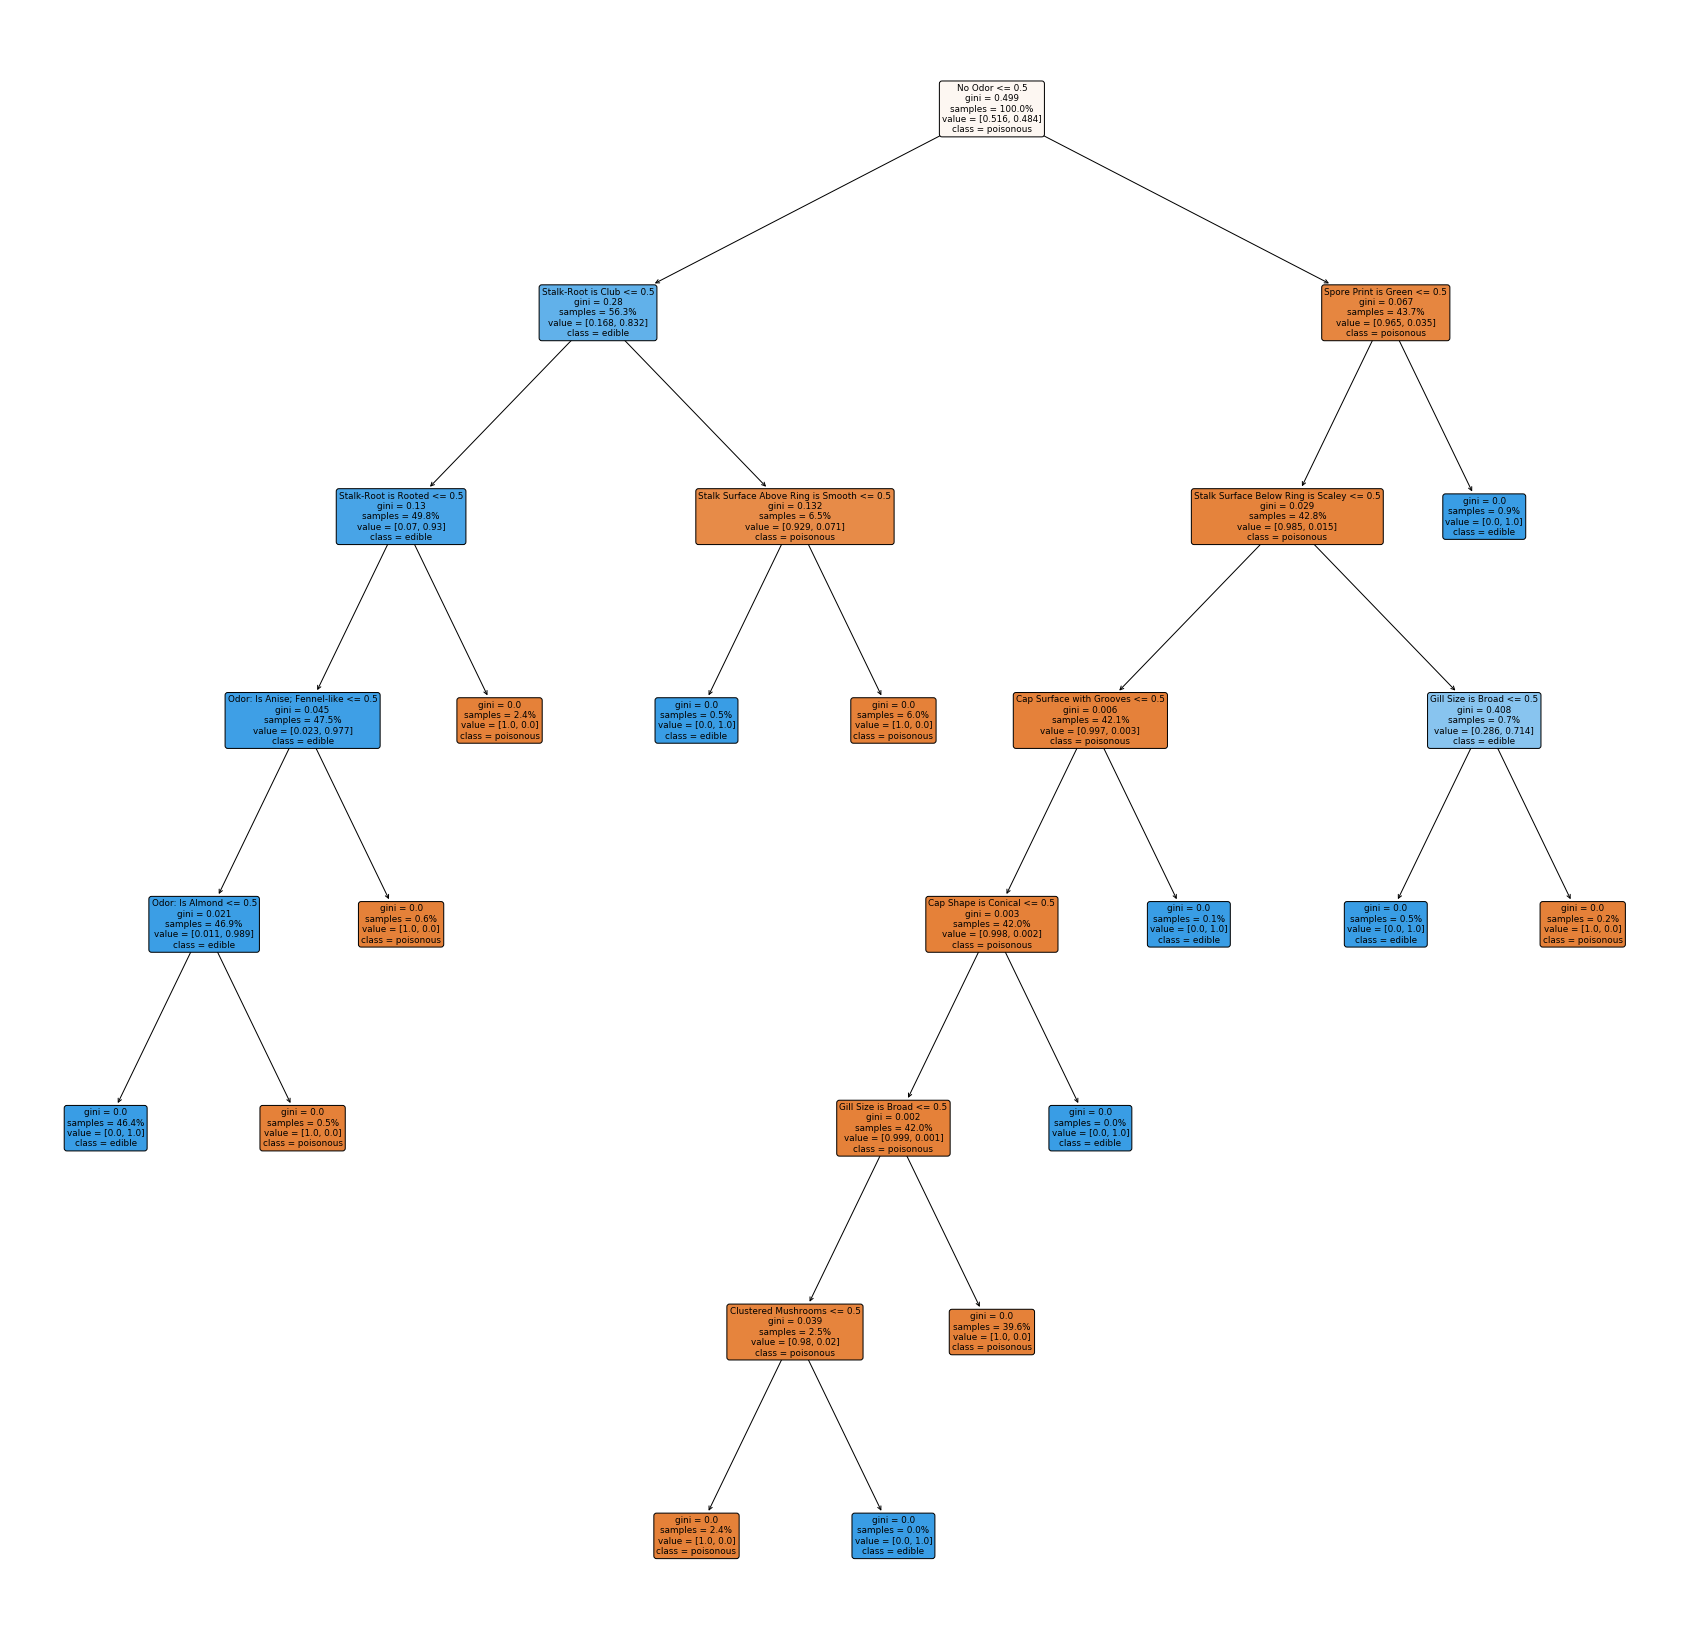

In [64]:
#Lets Train the model from scratch to ensure the correct workflow to ensure the correct splits:
#Todo make sure the Graphviz executables are on your systems' PATH
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn import tree
from matplotlib import pyplot as plt
#read the data into dataframe

#encode to one hot encoding which gives each value of a column a yes or no (1,0)
#to feed into our model

mush_df2 = pd.get_dummies(mush_clean)

#Clean up of one-hot encoding feature values, note this was done after the three/gini was completed to only select
#features included in tree, if you are re-running this code with a different random state you will have to rename

mush_df2 = mush_df2.rename(columns={'stalk-root_club': 'Stalk-Root is Club',
                                      'stalk-root_rooted': 'Stalk-Root is Rooted',
                                      'spore-print-color_green': 'Spore Print is Green',
                                      'odor_anise': 'Odor: Is Anise; Fennel-like',
                                      'odor_almond': 'Odor: Is Almond',
                                      'stalk-surface-above-ring_smooth': 'Stalk Surface Above Ring is Smooth',
                                      'stalk-surface-below-ring_scaly': 'Stalk Surface Below Ring is Scaley',
                                      'gill-size_broad': 'Gill Size is Broad',
                                      'cap-surface_grooves': 'Cap Surface with Grooves',
                                      'population_clustered': 'Clustered Mushrooms',
                                      'cap-shape_conical': 'Cap Shape is Conical',
                                      'odor_none': 'No Odor'
                                   })

# Reprocess dataframe with dictionary values 

#set the variables to x
X_mush = mush_df2.iloc[:,2:]

#set target values poisonous or not to y
y_mush = mush_df2.iloc[:,1]

feature_names = list(mush_df2.iloc[:,2:])
class_names = list(mush_df.iloc[:,0])
#print(class_names)
#print(feature_names)

# use the variables X_train2, y_train2 and assign a test size of 25%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush,test_size=0.25, random_state=0)

#What is the accuracy of the Model?
model = DecisionTreeClassifier(criterion = 'gini',random_state=True)
model.fit(X_train2, y_train2)

pred_model = model.predict(X_test2)

print(cl('Accuracy of the model is {:.2%}'.format(accuracy_score(y_test2, pred_model)), attrs = ['bold']))
print(cl('F1 of the model is {:.2%}'.format(f1_score(y_test2, pred_model)), attrs = ['bold']))
print(cl('ROC AUC of the model is {:.2%}'.format(roc_auc_score(y_test2, pred_model)), attrs = ['bold']))
print(cl('Recall of the model is {:.2%}'.format(recall_score(y_test2, pred_model)), attrs = ['bold']))

#train the model
clf = DecisionTreeClassifier(criterion='gini',random_state=0,).fit(X_train2, y_train2)

#plot the tree
#plot_tree(decision,clf,feature_names,class_names,proportion=True)
plt.figure(figsize=(30,30))
tree.plot_tree(clf,feature_names=feature_names, class_names=class_names,proportion=True,rounded=True,filled=True)
#instead of plotting with can export to a .dot file we can then use this editor to customize further this
#is what I used in the image below

tree.export_graphviz(clf, filled=True, rounded=True)




